# Introduction

This notebook shows how the CSV files can be analyzed interactively. Jupyter needs to be installed. 

First clone the [dataset](git clone https://github.com/fivethirtyeight/russian-troll-tweets.git) from github. Open this notebook in Jupyter after that. 

The notebook expects the tweets to be available in the directory "russian-troll-tweets" from where it is opened/loaded from.


In [1]:
from os import listdir, mkdir
from os.path import join, isfile, exists

SOURCE_DIR = "russian-troll-tweets"

def get_csv_files(dirname):
    return [join(dirname, f) for f in listdir(dirname) if f.endswith(".csv") and isfile(join(dirname, f))]

files = get_csv_files(SOURCE_DIR)

In [2]:
print("number of CSV files read: ", len(files))

number of CSV files read:  9


The filenames of the CSVs is gathered. There should be 9 files.

In [3]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


[Pandas](https://pandas.pydata.org/) is a popular and widely used data analysis library. We will be using this to analyze the CSVs.

In [5]:
date_cols = ['publish_date', 'harvested_date']
df = pd.DataFrame()
for file in files:
    print("reading file ", file)
    df = df.append(pd.read_csv(file, parse_dates=date_cols, infer_datetime_format=True))
    

reading file  russian-troll-tweets/IRAhandle_tweets_4.csv
reading file  russian-troll-tweets/IRAhandle_tweets_5.csv
reading file  russian-troll-tweets/IRAhandle_tweets_7.csv
reading file  russian-troll-tweets/IRAhandle_tweets_6.csv
reading file  russian-troll-tweets/IRAhandle_tweets_2.csv
reading file  russian-troll-tweets/IRAhandle_tweets_3.csv
reading file  russian-troll-tweets/IRAhandle_tweets_1.csv
reading file  russian-troll-tweets/IRAhandle_tweets_8.csv
reading file  russian-troll-tweets/IRAhandle_tweets_9.csv


In [6]:
print("number of records: ", len(df))

number of records:  2973371


The files are loaded into a pandas DataFrame object. The columns "publish_date" and "harvested_date" have date and time values and this information is provided to the read_csv method in pandas. 

A successful load results in 2973371 records being loaded into the DataFrame.

In [7]:
df.dtypes

external_author_id           float64
author                        object
content                       object
region                        object
language                      object
publish_date          datetime64[ns]
harvested_date        datetime64[ns]
following                      int64
followers                      int64
updates                        int64
post_type                     object
account_type                  object
new_june_2018                  int64
retweet                        int64
account_category              object
dtype: object

Now the number of dataframes (records) on a day by day basis can be computed and plotted as a chart.

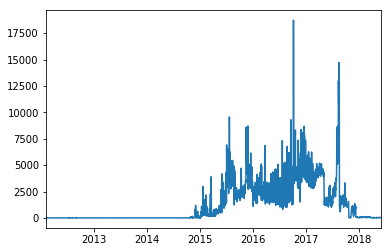

In [8]:
df['publish_date'].dt.date.value_counts().plot()

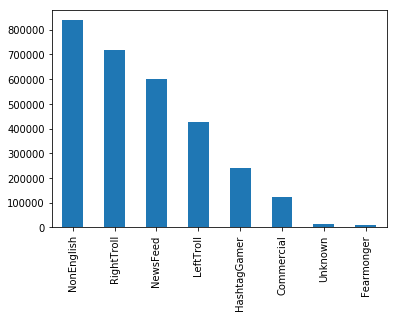

In [11]:
df['account_category'].value_counts().plot(kind="bar")

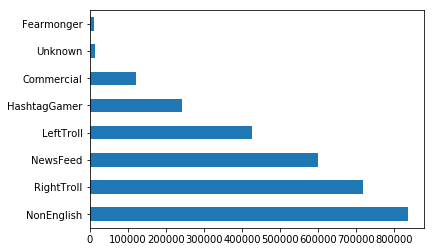

In [15]:
df['account_category'].value_counts().plot.barh()

In [19]:
df['date'] = df['publish_date'].dt.date
df.groupby(['date', 'account_category']).size()

date        account_category
2012-02-02  NonEnglish           4
2012-02-04  NonEnglish           1
2012-02-05  NonEnglish           1
2012-02-06  LeftTroll            1
            NonEnglish           2
2012-02-07  LeftTroll            1
            NonEnglish           2
2012-02-08  LeftTroll            1
            NonEnglish           3
2012-02-09  NonEnglish           1
2012-02-11  NonEnglish           1
2012-02-12  NonEnglish           2
2012-02-13  NonEnglish           1
2012-02-14  LeftTroll            1
2012-02-16  NonEnglish           1
2012-02-17  NonEnglish           2
2012-02-21  NonEnglish           1
2012-02-23  NonEnglish           1
2012-02-24  NonEnglish           3
2012-02-25  NonEnglish           6
2012-02-29  LeftTroll            1
2012-03-07  LeftTroll            1
2012-03-08  LeftTroll            1
            NonEnglish           1
2012-03-12  LeftTroll            1
            NonEnglish           1
2012-03-13  NonEnglish           1
2012-03-14  NonEnglish    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122bbce80>], dtype=object)

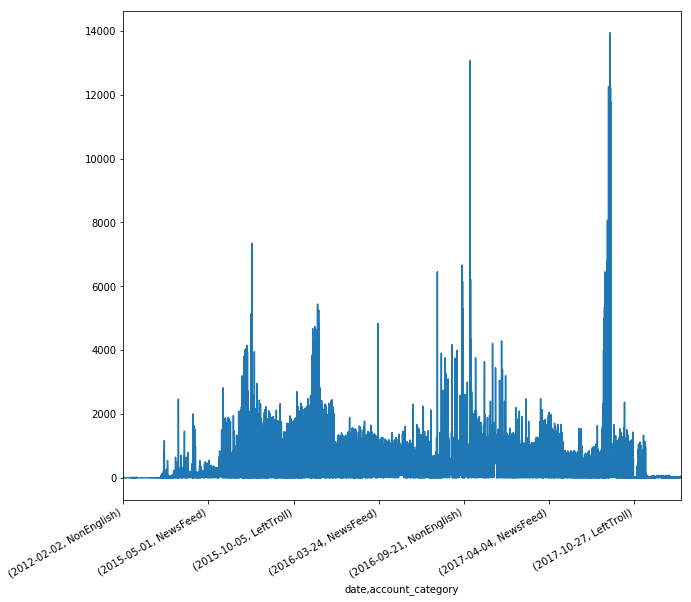

In [25]:
df.groupby(['date', 'account_category']).size().plot(subplots=True, figsize=(10, 10))